# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [2]:
df = pd.read_csv(r'C:\Users\Zoe\AppData\Local\Temp\Temp1_archive.zip\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Great, there's no missing value here.

# EXPLORATORY DATA ANALYSIS

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 0, 'Genuine Transaction')

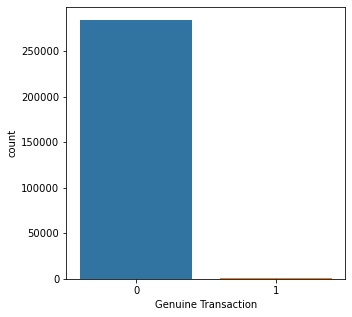

In [5]:
plt.figure(figsize = (5, 5))
sns.countplot(data = df, x = df['Class'])
plt.xlabel('Genuine Transaction')


 - 0 -  Genuine
 - 1 -  Fraud
 - WE CAN SEE THAT 99% PERCENT OF TRANSACTION IS GENUINE WHICH IS NOT GOOD.
 - THIS ALSO INDICATES IMBALANCED DATA.

In [6]:
#SCALING
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: amount, Length: 284807, dtype: float64

In [7]:
#dropping timr and Amount
df = df.drop(['Time', 'Amount'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [9]:
#features and labels
y = df['Class']
x = df.drop(['Class'], axis = 1)

In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [11]:
#train test split
from sklearn.model_selection import train_test_split 
x_train , x_test, y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('x train : ', x_train.shape)
print('y train :', y_train.shape)


x train :  (227845, 29)
y train : (227845,)


In [12]:
#handling imbalaced data using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
x_train_resample, y_train_resample = sm.fit_resample(x_train , y_train.ravel())
print('x train after resampling: ',x_train_resample.shape)
print('y train after resampling: ', y_train_resample.shape)

x train after resampling:  (454902, 29)
y train after resampling:  (454902,)


# MODEL EVALUATION

In [13]:
import sys
!{sys.executable} -m pip install xgboost

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

In [15]:
def model(m):
    m1 = m.fit(x_train_resample, y_train_resample)
    y_pred = m1.predict(x_test)
    csm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("confusion matrix : ", csm, "\n")
    print("\n")
    print("accuracy score {:.2f}".format(acc *100 ),"\n")
    print("precision score {:.2f}".format(prec), "\n")
    print("f1 score :{:.2f}".format(f1), "\n")
    print("recall score: {:.2f}".format(recall) , "\n")
    print('ROC AUC Score: {:.2f}'.format(roc),"\n")
    

In [16]:
m = LogisticRegression()
model(m)

confusion matrix :  [[55409  1455]
 [    8    90]] 



accuracy score 97.43 

precision score 0.06 

f1 score :0.11 

recall score: 0.92 

ROC AUC Score: 0.95 



In [17]:
model(DecisionTreeClassifier())

confusion matrix :  [[56778    86]
 [   26    72]] 



accuracy score 99.80 

precision score 0.46 

f1 score :0.56 

recall score: 0.73 

ROC AUC Score: 0.87 



In [18]:
model(RandomForestClassifier(n_estimators = 10))

confusion matrix :  [[56851    13]
 [   19    79]] 



accuracy score 99.94 

precision score 0.86 

f1 score :0.83 

recall score: 0.81 

ROC AUC Score: 0.90 



In [19]:
m1 = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
model(m1)

C:\Users\Zoe\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


confusion matrix :  [[56741   123]
 [   12    86]] 



accuracy score 99.76 

precision score 0.41 

f1 score :0.56 

recall score: 0.88 

ROC AUC Score: 0.94 



- AS WE CAN SEE, RANDOM FOREST HAS PERFORMED BETTER THAN OTHER ALGORITHMS.
- WHEREFORE FITTING RANDOM FOREST IN THIS MODEL 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC score: 0.9795702133554604
Accuracy Score:  0.9995962220427653


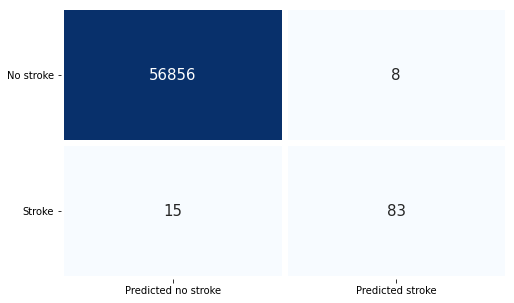

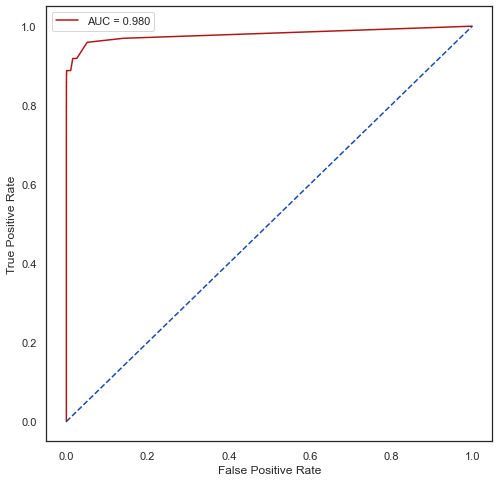

In [21]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(n_estimators= 100)
classifier.fit(x_train_resample, y_train_resample)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In this python machine learning project, we built a binary classifier using the Random Forest algorithm to detect credit card fraud transactions. Handling imalanced issues using SMOTE techiniques and achieving an accuracy more than 99%. THANK YOU.